In [33]:
import sys
sys.path.insert(1, '../src/magpies/')
from magpies import *
from atmos import *
import numpy as np
from math import *
from scipy.optimize import minimize
import matplotlib as mpl
import matplotlib.pyplot as plt

In [34]:
## Radius and mass of neutron star
Rns = 12  ## km
Mns = 1.4 ## M_solar
Tb = pow(10, 7.1730)  ## K
Bp = 1e11 ## G

## Instrument and exposure
eph = np.linspace (0.20, 3.00, 32) ## Nicer soft X-ray range
nphot = 5e5

g14c = g14 (Rns, Mns) ## computing the free fall acceleration
 
print ('g14 = ', g14c, ' xg = ', xg(Rns, Mns), 1.0 / (1 - xg(Rns, Mns)))

g14 =  1.6054273795798544  xg =  0.3465367097448258 1.530307845769737


In [35]:
## Initialising the atmosphere
atm_iron_2003 = NS_atmosphere ('Potekhin_2003_iron', g14c, Tb, Bp)
atm_iron_2003.describe ()

Surface temperatures for magnetised envelope of NS
Following fit from Potekhin, Yakovlev, Chabrier & Gnedin (2003) for iron envelope
The Astrophysical Journal, Volume 594, Issue 1, pp. 404-418  2003ApJ...594..404P
Same fits are provided in Beznogov, Potekhin & Yakovlev (2021) for iron envelope
Physics Reports, Volume 919, p. 1-68 2021PhR...919....1B


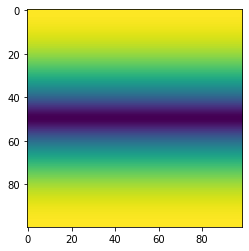

In [36]:
theta = np.linspace (0, pi, 100)  ## theta coordinates
phi   = np.linspace (0, 2*pi, 99) ## phi coordinates

theta1, phi1 = np.meshgrid (theta, phi)

Ts = atm_iron_2003.Ts (theta1) ## Surface temperatures

#for i in range (0, Ts.shape[0]):
#    for j in range (0, Ts.shape[1]):
#        Ts[i,j] = 1e6

plt.imshow(Ts.T)

In [37]:
## Here we produce and store the soft X-ray spectra for two orientations: pole on and equatorial 
sp_red_n, map_of_visible = get_redshifted_spectra_pole_photons (theta, phi, Ts, Rns, Mns, eph, nphot)
sp_red_n_eq, map_of_visible = get_redshifted_spectra_equator_photons (theta, phi, Ts, Rns, Mns, eph, nphot)

../src/magpies/magpies.py:214: RuntimeWarning: divide by zero encountered in log
  x = (1.0 - u)*y*(1.0 + u*u*y*y/112.0 - e/100.0*u*y*(np.log(1-y/2.0) + y/2))
../src/magpies/magpies.py:216: RuntimeWarning: invalid value encountered in arccos
  return np.arccos(res)


In [38]:
L =  compute_L (theta, phi, Rns, Ts)
Teff = compute_Teff (theta, phi, Rns, Ts)
#bb1 = single_BB_photons (1.07*Teff, Rns, Mns, eph, nphot)
bb1 = examine_spectral_fit_1BB_photons ([0.6, 1.2], Teff, Rns, Mns, eph, nphot, L)
bb2 = examine_spectral_fit_2BB_photons ([0.4613, 0.2819, 1.0225, 1.1914], Teff, Rns, Mns, eph, nphot, L)
#bb2 = two_BB_photons ([0.4613, 0.2819, 1.0225, 1.1914], Teff, Rns, Mns, eph, nphot)

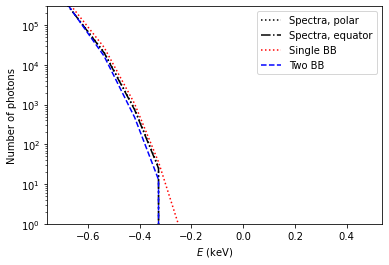

In [39]:
plt.plot (np.log10(eph), sp_red_n, 'k:', label='Spectra, polar')
plt.plot (np.log10(eph), sp_red_n_eq, 'k-.', label='Spectra, equator')
plt.plot (np.log10(eph), bb1, 'r:', label='Single BB')
plt.plot (np.log10(eph), bb2, 'b--', label='Two BB')
plt.xlabel(r'$E$ (keV)')
plt.ylabel('Number of photons')
plt.yscale('log')
plt.ylim([1, 3e5])
plt.legend()




[0.2580653765543244, 0.2580653765543244, 1.1797993821257728, 1.1797993821257728, 2.5643546019804564, 0.04506282849511045]


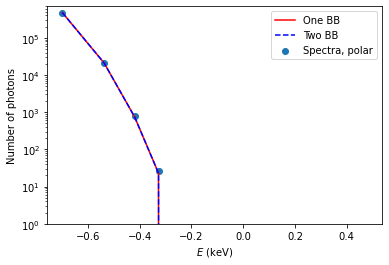

In [40]:
bb2_opt_par = fit_spectral_model_Cstat (Teff, Rns, Mns, sp_red_n, eph, nphot, L)
print (bb2_opt_par)


bb2_opt = examine_spectral_fit_2BB_photons (bb2_opt_par[0:4], Teff, Rns, Mns, eph, nphot, L)


bb1_opt = examine_spectral_fit_1BB_photons ([bb2_opt_par[0]*2, bb2_opt_par[2]], Teff, Rns, Mns, eph, nphot, L)




plt.scatter (np.log10(eph), sp_red_n, label='Spectra, polar')
plt.plot (np.log10(eph), bb1_opt, 'r-', label='One BB')
plt.plot (np.log10(eph), bb2_opt, 'b--', label='Two BB')
plt.xlabel(r'$E$ (keV)')
plt.ylabel('Number of photons')
plt.yscale('log')
plt.ylim([1, 7e5])
plt.legend()

In [41]:
print (bb2_opt_par[0:4])

[0.2580653765543244, 0.2580653765543244, 1.1797993821257728, 1.1797993821257728]


In [42]:
print (compute_L_param (bb2_opt_par[0:4], Teff, Rns, Mns), L)

6.65626926191413e+30 6.656385831516438e+30
